# Descriptive statistics figure generation

In this notebook is used to generate the tables and graphical summaries for [Section 1.3 Descriptive Statistics](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in the **No Bullshit Guide to Statistics**.

Instructions:
- Run all cells
- Figures will be saved to `figures/data/` folder
- Manually move files to the `/Users/ivan/Projects/Minireference/STATSbook/figures/data/` directory

TODOs:
- finish all figure generation
- test table generation
- add script to move figures into book directory
- add support for colour vs. black and white theme


### Notebooks setup

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

In [3]:
# Figures setup
DESTDIR = "figures/data/descr-stats"  # where to save figures

rcparams = {
    'figure.figsize': (7,4),
    #     'figure.dpi': 300,
    'font.serif': ['Palatino'],
    'font.family': 'serif',    
    #     'font.size': 20,
    #     'figure.titlesize': 16,
    #     'axes.titlesize':22,
    #     'axes.labelsize':20,
    #     'xtick.labelsize': 12,
    #     'ytick.labelsize': 12,
    #     'legend.fontsize': 16,
    #     'legend.title_fontsize': 18,
}
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",  # ALT sns.color_palette('Blues', 4)
    rc=rcparams,
)

# %config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
from plot_helpers import savefigure

## Load the `students` dataset from CSV

In [5]:
students = pd.read_csv("../datasets/students.csv")

In [6]:
# students data
students

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1
5,6,business,debate,10.80,79.8
6,7,science,lecture,7.81,72.7
7,8,business,lecture,9.13,75.4
8,9,business,lecture,5.21,57.0
9,10,science,lecture,7.71,69.0


In [7]:
# rows
students.index

RangeIndex(start=0, stop=15, step=1)

In [8]:
# columns
students.columns

Index(['student_ID', 'background', 'curriculum', 'effort', 'score'], dtype='object')

# Describing numeric data

Let's look at the `score` variable.

In [9]:
students["score"].count()

15

In [10]:
students["score"].sort_values().values

array([57. , 57.6, 62.9, 67. , 69. , 70.3, 70.4, 72.7, 75. , 75. , 75.4,
       76.1, 79.8, 84.3, 96.2])

In [11]:
# sorted(students['score'])

### Min, max, and median

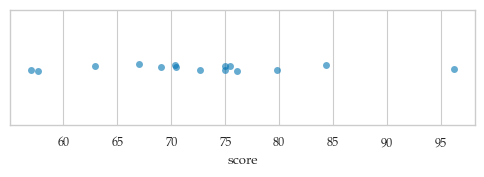

In [12]:
with plt.rc_context({"figure.figsize":(6,1.5)}):
    sns.stripplot(x="score", data=students, jitter=0.03, alpha=0.6)

In [13]:
# # ALT. also show mean via https://stackoverflow.com/a/67579487/127114
# with plt.rc_context({"figure.figsize":(6,1.5)}):
#     sns.stripplot(x="score", data=students, jitter=0.03, alpha=0.6)
#     color0 = sns.color_palette()[0]
#     sns.boxplot(showmeans=True,
#                 meanline=True,
#                 meanprops={'color': color0, 'ls': '-', 'lw': 2},
#                 medianprops={'visible': False},
#                 whiskerprops={'visible': False},
#                 zorder=10,
#                 x="score",
#                 data=students,
#                 showfliers=False,
#                 showbox=False,
#                 showcaps=False)

### Mean, variance, and standard deviation

#### Example distributions with different Std

Saved figure to figures/data/descr-stats/descriptive_statistics__same_mean_different_Std.pdf
Saved figure to figures/data/descr-stats/descriptive_statistics__same_mean_different_Std.png


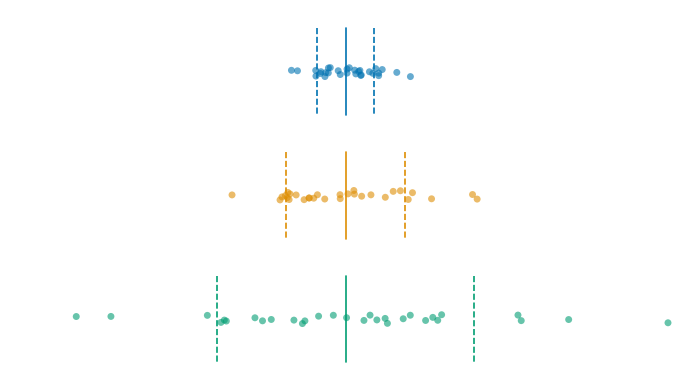

In [14]:
import matplotlib.ticker as ticker
from scipy.stats import norm

filename = os.path.join(DESTDIR, "descriptive_statistics__same_mean_different_Std.pdf")


np.random.seed(222)
mean = 0
stda, stdb, stdc = 5, 10, 20
n = 30

dfabc = pd.DataFrame({
    "a)": norm.rvs(mean, stda, size=n),
    "b)": norm.rvs(mean, stdb, size=n),
    "c)": norm.rvs(mean, stdc, size=n)
}).melt()

with sns.axes_style("ticks"):
    ax = sns.stripplot(y="variable", x="value", hue="variable", data=dfabc, jitter=0.04, alpha=0.6)
    ax.set(xlabel=None, ylabel=None)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    absmax = dfabc["value"].apply(abs).max()
    xlim = absmax + 2 
    ax.set(xlim=(-xlim, xlim))
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
    ax.grid(False)
    ax.tick_params(left=False, bottom=False)
    ax.legend().remove()

color0 = sns.color_palette()[0]
color1 = sns.color_palette()[1]
color2 = sns.color_palette()[2]

def drawlines(ax, data, lims, color):
    mean = 0 # data.mean()
    std = data.std()
    ax.axvline(mean, *lims, linestyle="-", color=color)
    ax.axvline(mean+std, *lims, linestyle="--", color=color)
    ax.axvline(mean-std, *lims, linestyle="--", color=color)

eps = 0.05

dataa = dfabc[dfabc["variable"]=="a)"]["value"]
datab = dfabc[dfabc["variable"]=="b)"]["value"]
datac = dfabc[dfabc["variable"]=="c)"]["value"]

drawlines(ax, dataa, (  1-eps, 2/3+eps), color=color0)
drawlines(ax, datab, (2/3-eps, 1/3+eps), color=color1)
drawlines(ax, datac, (1/3-eps,     eps), color=color2)

savefigure(ax, filename)

## Histograms

In [15]:
students["score"].value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [16]:
# note mode is the bin 70--80, which contains 8 values

<Axes: xlabel='score', ylabel='Count'>

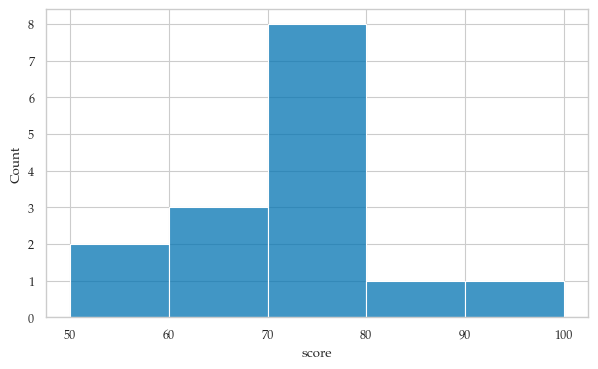

In [17]:
sns.histplot(x="score", data=students,
             bins=[50, 60, 70, 80, 90, 100])

Saved figure to figures/data/descr-stats/descr-stats-histogram.pdf
Saved figure to figures/data/descr-stats/descr-stats-histogram.png


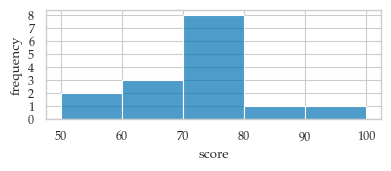

In [18]:
filename = os.path.join(DESTDIR, "descr-stats-histogram.pdf")

with plt.rc_context({"figure.figsize":(4,1.8)}):
    ax = sns.histplot(x="score", data=students, alpha=0.7, bins=[50,60,70,80,90,100])
    ax.set(ylabel="frequency")
    ax.set_yticks(range(0,9))
    ax.figure.tight_layout()

savefigure(ax, filename)

In [19]:
# ALT
# students['score'].hist(bins=[50,60,70,80,90,100])

## Quartiles and box plots

In [20]:
Q1 = students["score"].quantile(0.25)
Q1

68.0

In [21]:
students["score"].quantile(0.5)  # Q2 = median

72.7

In [22]:
Q3 = students["score"].quantile(0.75)
Q3

75.75

In [23]:
IQR = Q3 - Q1
IQR

7.75

In [24]:
# ALT
# from scipy import stats
# stats.iqr(scores)

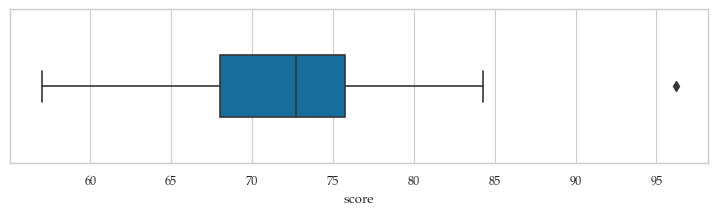

In [25]:
with plt.rc_context({"figure.figsize":(9,2)}):
    sns.boxplot(x="score", data=students, width=0.4)

In [26]:
students["score"].max(), Q3 + 1.5*IQR, 75.75+1.5*7.75

(96.2, 87.375, 87.375)

## All summary statistics

In [27]:
students["score"].describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [28]:
students[["score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
score,15.0,72.58,9.98,57.0,68.0,72.7,75.75,96.2


In [29]:
# print(students[["score"]].describe().T.to_latex())

## Comparing two numeric variables


Saved figure to figures/data/descr-stats/scatterplot.pdf
Saved figure to figures/data/descr-stats/scatterplot.png


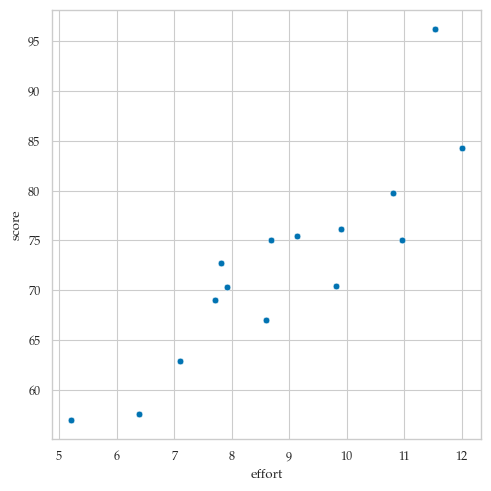

In [30]:
filename = os.path.join(DESTDIR, "scatterplot.pdf")

with plt.rc_context({"figure.figsize":(5,5)}):
    ax = sns.scatterplot(x="effort", y="score", data=students)
    savefigure(ax, filename)

In [31]:
students[["effort", "score"]].cov()

,effort,score
effort,3.8,17.10
score,17.1,99.59


In [32]:
students[["effort", "score"]].corr()

,effort,score
effort,1.00,0.88
score,0.88,1.00


In [33]:
students["curriculum"]=="debate"

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14     True
Name: curriculum, dtype: bool

## Multiple numerical variables

In [34]:
students.groupby("curriculum")["score"].describe()

,count,mean,std,min,25%,50%,75%,max
curriculum,,,,,,,,
debate,8.0,76.46,10.52,62.9,69.55,75.55,80.92,96.2
lecture,7.0,68.14,7.76,57.0,63.30,70.30,73.85,75.4


In [35]:
# from functools import partial
# students.pivot_table(
#     index="curriculum", values=["score"],
#     aggfunc=[len, np.mean, np.std, np.min, np.max])

In [36]:
# # to generate the table
# print(
#     '{ \\footnotesize\n' \
#     + students.groupby('curriculum')['score'].describe().to_latex() \
#     + '}'
# )

<Axes: xlabel='score', ylabel='curriculum'>

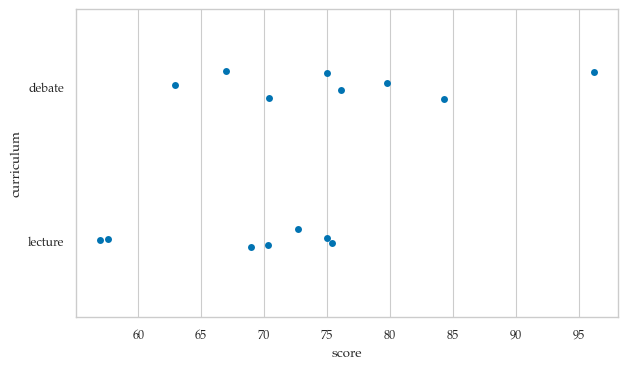

In [37]:
sns.stripplot(x="score", y="curriculum", data=students)

<Axes: xlabel='score', ylabel='curriculum'>

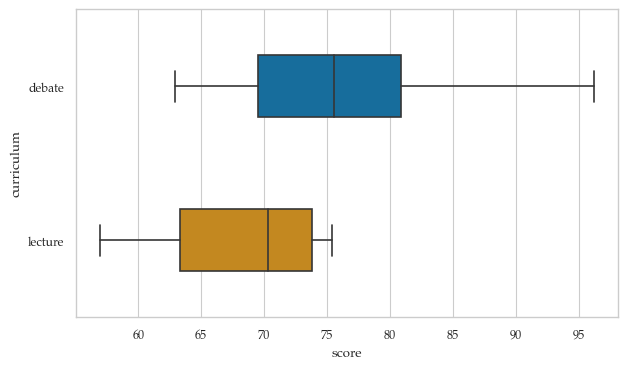

In [38]:
sns.boxplot(x="score", y="curriculum", data=students, width=0.4)

Saved figure to figures/data/descr-stats/stripchart-boxplot-histogram-effort-vs-score.pdf
Saved figure to figures/data/descr-stats/stripchart-boxplot-histogram-effort-vs-score.png


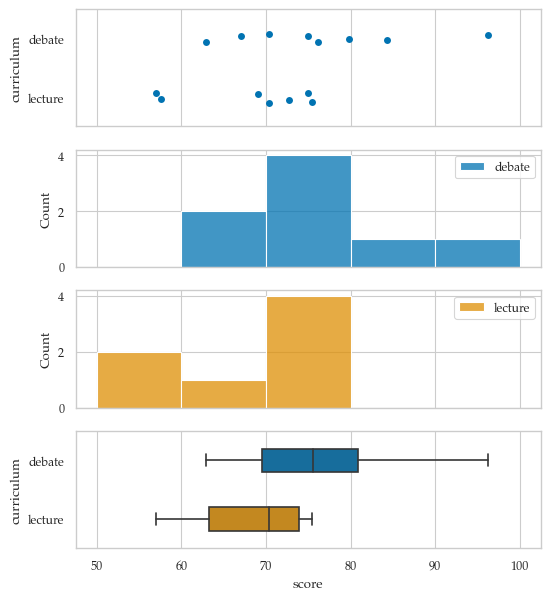

In [39]:
# combined plots (figure in book)

filename = os.path.join(DESTDIR, "stripchart-boxplot-histogram-effort-vs-score.pdf")

with plt.rc_context({"figure.figsize":(6,7)}):
    fig, axs = plt.subplots(4, 1, sharex=True)

    # stripplots
    g0 = sns.stripplot(x="score", y="curriculum", data=students, ax=axs[0])
    g0.set(xlabel=None)

    # histograms
    blue, yellow  = sns.color_palette()[0], sns.color_palette()[1]
    bins = [50, 60, 70, 80, 90, 100]
    dscores = students[students["curriculum"]=="debate"]
    lscores = students[students["curriculum"]=="lecture"]
    sns.histplot(x="score", data=dscores, color=blue, ax=axs[1], bins=bins)
    sns.histplot(x="score", data=lscores, color=yellow, ax=axs[2], bins=bins)
    axs[1].legend(labels=["debate"])
    axs[2].legend(labels=["lecture"])

    # boxplots
    sns.boxplot(x="score", y="curriculum", data=students, width=0.4, ax=axs[3])

    savefigure(ax, filename)

In [40]:
# # ALT Grouped bar charts
# sns.histplot(x="score", hue="curriculum", data=students, bins=bins, multiple="dodge")

In [41]:
# # ALT2 (displot using caregorical as row-variable
# bins = [50, 60, 70, 80, 90, 100]
# sns.displot(x='score', row='curriculum', data=students,
#             hue='curriculum', alpha=0.8, bins=bins, aspect=2.5, height=2)

<Axes: xlabel='curriculum', ylabel='score'>

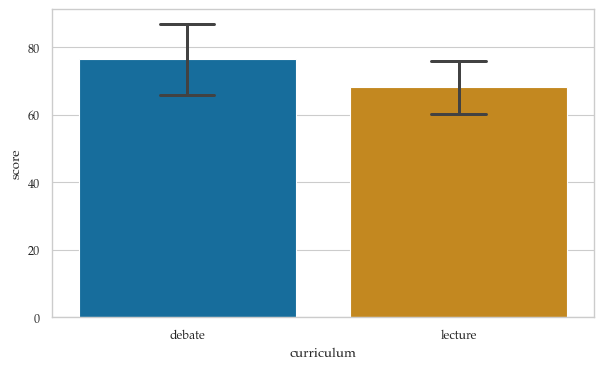

In [42]:
import numpy as np
from statistics import mean
sns.barplot(x="curriculum", y="score", data=students,
            estimator=np.mean, errorbar="sd", capsize=.2)

# Categorical data

In [43]:
students["background"]

0         arts
1      science
2         arts
3         arts
4      science
5     business
6      science
7     business
8     business
9      science
10    business
11        arts
12     science
13     science
14        arts
Name: background, dtype: object

In [44]:
students["background"].describe()

count          15
unique          3
top       science
freq            6
Name: background, dtype: object

In [45]:
# frequencies
students["background"].value_counts().sort_index()

arts        5
business    4
science     6
Name: background, dtype: int64

In [46]:
# relative frequencies
students["background"].value_counts(normalize=True)

science     0.40
arts        0.33
business    0.27
Name: background, dtype: float64

In [47]:
# COMBINED TABLE
# df2 = (students["background"]
#         .value_counts()
#         .rename_axis("background")
#         .reset_index(name="frequency")
#         .set_index("background"))
# df2["relative frequency"] = df2["frequency"] / df2["frequency"].sum()
# df2

In [48]:
# ALT. 
# students["background"].value_counts() / len(students["background"])

<Axes: xlabel='background', ylabel='count'>

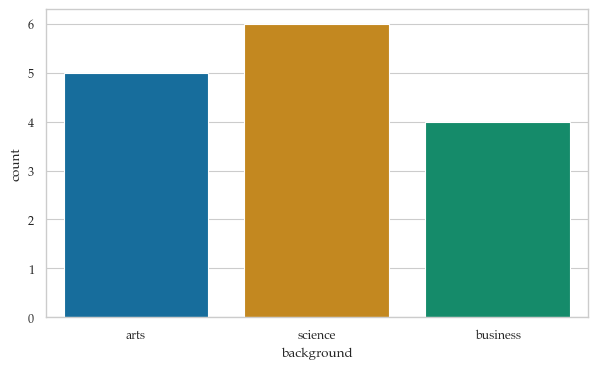

In [49]:
# bar chart of counts
sns.countplot(data=students, x="background")

In [50]:
# # bar chart of relative frequencies
# relfreqdf = (
#     students["background"]
#     .value_counts(normalize=True)
#     .rename_axis("background")
#     .reset_index(name="relative frequency")
# )
# sns.barplot(data=relfreqdf, x="background", y="relative frequency")

## Comparing two categodescribeal variables

In [51]:
# students[["background","curriculum"]]

In [52]:
# for i, (bg, cu) in students[['background','curriculum']].iterrows():
#     print("(\\texttt{"+bg+"},\\texttt{"+cu+"}),", end=" ")

In [53]:
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL")

background,arts,business,science,TOTAL
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
TOTAL,5,4,6,15


In [54]:
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize=True)

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.27,0.13,0.13,0.53
lecture,0.07,0.13,0.27,0.47
TOTAL,0.33,0.27,0.40,1.00


<Axes: xlabel='background', ylabel='count'>

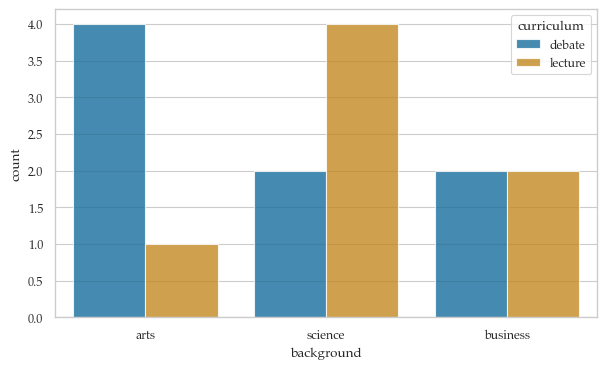

In [55]:
sns.countplot(x="background", hue="curriculum",
              data=students, alpha=0.8)

<Axes: xlabel='background', ylabel='Count'>

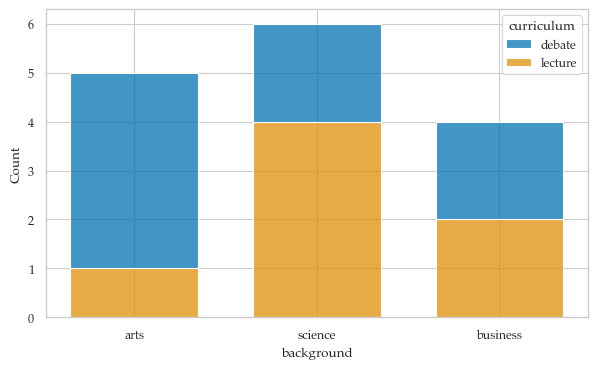

In [56]:
sns.histplot(x="background", hue="curriculum",
             data=students, multiple="stack", shrink=.7)

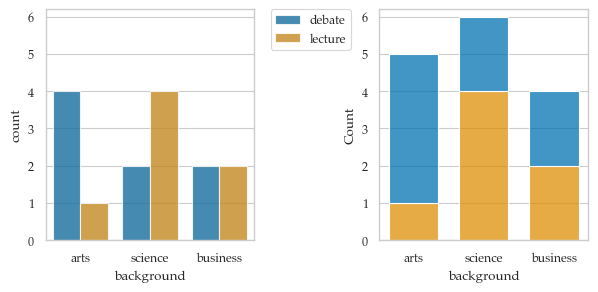

In [57]:
# combined side-by-side plots 
filename = os.path.join(DESTDIR, "descr-stats-dodged-countplot-and-stacked-barchart.pdf")
    
with plt.rc_context({"figure.figsize":(7,3)}):
    fig, axs = plt.subplots(1, 2)
    # LEFT
    sns.countplot(x="background", hue="curriculum", data=students, alpha=0.8, ax=axs[0])
    axs[0].get_legend().remove()
    axs[0].set_yticks([0,1,2,3,4,5,6])
    axs[0].set_ylim([0,6.2])
    # RIGHT
    sns.histplot(x="background", hue="curriculum", data=students, multiple="stack", shrink=0.7, ax=axs[1])
    axs[1].get_legend().remove()
    axs[1].grid(False, axis="x")
    axs[1].set_yticks([0,1,2,3,4,5,6])
    axs[1].set_ylim([0,6.2])
    #
    fig.legend(bbox_to_anchor=(0.57, 0.9))
    plt.subplots_adjust(wspace=0.6)
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [58]:
# # ALT1
# sns.displot(data=students, x="background", hue="curriculum", multiple="stack", shrink=0.8)

In [59]:
# # ALT2
# pd.crosstab(
#     index=students["curriculum"],
#     columns=students["background"],
# ).T.plot(kind="bar", stacked=True, rot=0)

In [60]:
# stacked joint relative freqs
# sns.histplot(x="background", hue="curriculum",
#              data=students, shrink=.7,
#              multiple="stack", stat="proportion")

In [61]:
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="columns")

background,arts,business,science,TOTAL
curriculum,,,,
debate,0.8,0.5,0.33,0.53
lecture,0.2,0.5,0.67,0.47


Saved figure to figures/data/descr-stats/descr-stats-curriculum-conditional-on-background.pdf
Saved figure to figures/data/descr-stats/descr-stats-curriculum-conditional-on-background.png


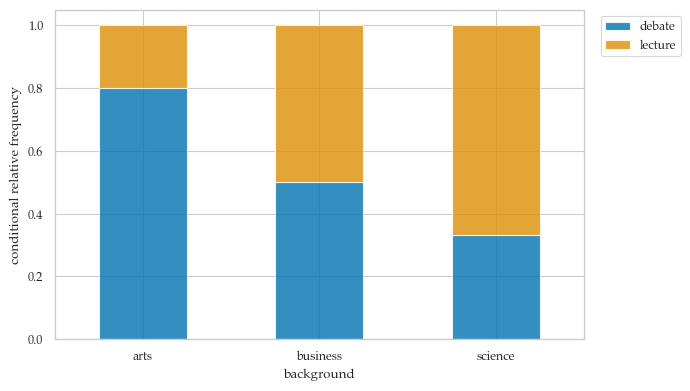

In [62]:
filename = os.path.join(DESTDIR, "descr-stats-curriculum-conditional-on-background.pdf")

ct1 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="columns",
)
axct1 = ct1.T.plot(kind="bar", stacked=True, rot=0, alpha=0.8)
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.ylabel("conditional relative frequency")

savefigure(axct1, filename)

In [63]:
pd.crosstab(index=students["curriculum"],
            columns=students["background"],
            margins=True, margins_name="TOTAL",
            normalize="index")

background,arts,business,science
curriculum,,,
debate,0.50,0.25,0.25
lecture,0.14,0.29,0.57
TOTAL,0.33,0.27,0.40


Saved figure to figures/data/descr-stats/descr-stats-background-conditional-on-curriculum.pdf
Saved figure to figures/data/descr-stats/descr-stats-background-conditional-on-curriculum.png


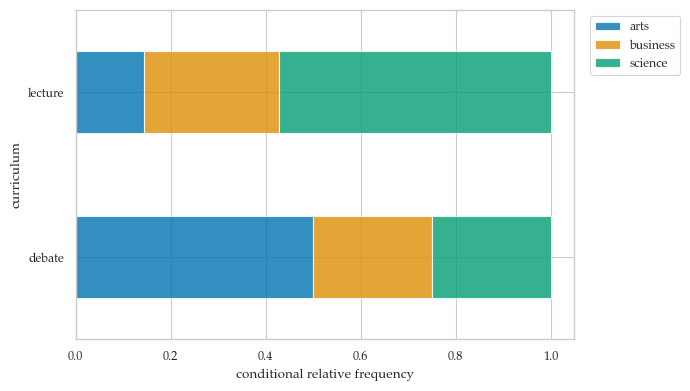

In [64]:
filename = os.path.join(DESTDIR, "descr-stats-background-conditional-on-curriculum.pdf")

ct2 = pd.crosstab(
    index=students["curriculum"],
    columns=students["background"],
    normalize="index",
)
axct2 = ct2.plot(kind="barh", stacked=True, rot=0, alpha=0.8, )
plt.legend(loc = "upper left", bbox_to_anchor=(1.02,1))
plt.xlabel("conditional relative frequency")

savefigure(axct2, filename)

## Discussion

### Mean as average

Saved figure to figures/data/descr-stats/mean-repeated-representative.pdf
Saved figure to figures/data/descr-stats/mean-repeated-representative.png


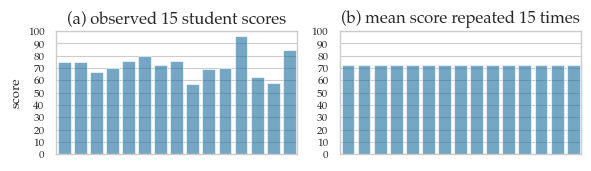

In [65]:
filename = os.path.join(DESTDIR, "mean-repeated-representative.pdf")

ylims = [0,100]
yticks = np.arange(0,110,10)

with plt.rc_context({"figure.figsize":(6,1.8)}):
    fig, (ax1, ax2) = plt.subplots(1,2)
    # (a)
    sns.barplot(data=students, y='score', x=students.index, color=blue, alpha=0.6, ax=ax1)
    ax1.set_ylim(ylims)
    ax1.set_yticks(yticks)
    ax1.yaxis.set_tick_params(labelsize=8)
    ax1.set_xticks([])
    ax1.set_title("(a) observed 15 student scores", fontsize=12)
    # (b)
    meanscore = students['score'].mean()
    sns.barplot(data=students, y=[meanscore]*15, x=students.index, color=blue, alpha=0.6, ax=ax2)
    ax2.set_ylim(ylims)
    ax2.set_yticks(yticks)
    ax2.yaxis.set_tick_params(labelsize=8)
    ax2.set_xticks([])
    ax2.set_title("(b) mean score repeated 15 times", fontsize=12)

savefigure(fig, filename)

### Different bin widths

In [66]:
list(range(50, 100, 10))
          

[50, 60, 70, 80, 90]

Saved figure to figures/data/descr-stats/histogram-varying-bin-number-6-panel.pdf
Saved figure to figures/data/descr-stats/histogram-varying-bin-number-6-panel.png


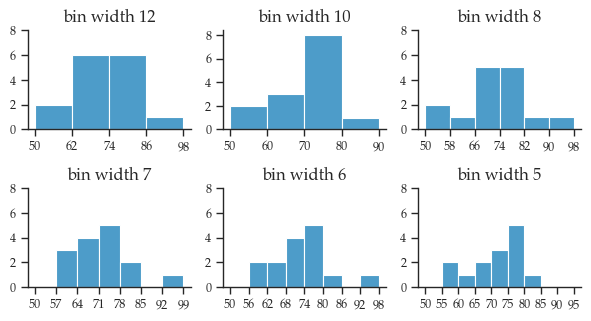

In [67]:
filename = os.path.join(DESTDIR, "histogram-varying-bin-number-6-panel")

binwidths = [12, 10, 8, 7, 6, 5]

with sns.axes_style("ticks", rc=rcparams):
    fig, axs_matrix = plt.subplots(2, 3, figsize=(6,3.3))
    axs = [ax for row in axs_matrix for ax in row]
    for ax, binwidth in zip(axs, binwidths):
        bins = list(range(50, 100, binwidth))
        sns.histplot(x="score", data=students, ax=ax, bins=bins, alpha=0.7)
        ax.set_xticks(bins)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_yticks(range(0,9,2))
        ax.set_title("bin width " + str(binwidth), fontsize=12)
        sns.despine(ax=ax, top=True, right=True)

savefigure(fig, filename)

Saved figure to figures/data/descr-stats/histogram-varying-bin-start-6-panel.pdf
Saved figure to figures/data/descr-stats/histogram-varying-bin-start-6-panel.png


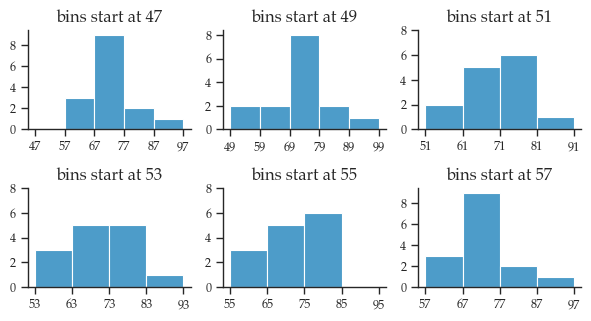

In [68]:
filename = os.path.join(DESTDIR, "histogram-varying-bin-start-6-panel.pdf")

binstarts = range(47, 58, 2)

with sns.axes_style("ticks", rc=rcparams):
    fig, axs_matrix = plt.subplots(2, 3, figsize=(6,3.3))
    axs = [ax for row in axs_matrix for ax in row]
    for ax, binstart in zip(axs, binstarts):
        bins = list(range(binstart, 100, 10))
        sns.histplot(x="score", data=students, ax=ax, bins=bins, alpha=0.7)
        ax.set_xticks(bins)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_yticks(range(0,9,2))
        ax.set_title("bins start at " + str(binstart), fontsize=12)
        sns.despine(ax=ax, top=True, right=True)

savefigure(fig, filename)

Saved figure to figures/data/descr-stats/scores-kdeplot.pdf
Saved figure to figures/data/descr-stats/scores-kdeplot.png


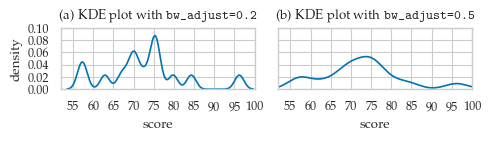

In [69]:
filename = os.path.join(DESTDIR, "scores-kdeplot.pdf")

binstarts = range(47, 58, 2)

xticks = range(45,110,5)
xlims = [52,100]

with plt.rc_context({"figure.figsize":(5,1.5)}):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    sns.kdeplot(data=students, x="score", bw_adjust=0.2, ax=ax1)
    sns.kdeplot(data=students, x="score", bw_adjust=0.5,  ax=ax2)
    #
    ax1.set_xticks(xticks)
    ax1.set_xlim(xlims)
    ax1.set_yticks(np.arange(0,0.11,0.02))
    ax1.set_ylabel("density")
    ax1.set_title(r"(a) KDE plot with \texttt{bw_adjust=0.2}", usetex=True)
    #
    ax2.set_xticks(xticks)
    ax2.set_xlim(xlims)
    ax2.set_title(r"(b) KDE plot with \texttt{bw_adjust=0.5}", usetex=True)

savefigure(fig, filename)